In [3]:
##AbdAllahSayedThabet_sec1g3_sec1task1
!pip install pyopenms


In [2]:
import pyopenms


In [13]:
print ("Avogadro's number is", pyopenms.Constants.AVOGADRO)


Avogadro's number is 6.0221367e+23


In [15]:

from pyopenms import *
edb = ElementDB()
edb.hasElement("O")

True

In [17]:
oxygen = edb.getElement("O")

print(oxygen.getName())

print(oxygen.getSymbol())

print(oxygen.getMonoWeight())
print(oxygen.getAverageWeight())
print ("One mole of oxygen weighs", 2*oxygen.getAverageWeight(), "grams")


Oxygen
O
15.994915
15.999405323160001
One mole of oxygen weighs 31.998810646320003 grams


In [19]:
sulfur = edb.getElement("S")


print(sulfur.getName())
#-------------------------
print(sulfur.getSymbol())
#---------------------------
print(sulfur.getMonoWeight())
#-------------------------------
print(sulfur.getAverageWeight())

isotopes = sulfur.getIsotopeDistribution()
print ("One mole of 16O2 weighs",  2*oxygen.getMonoWeight() ,"grams")

Sulfur
S
31.97207073
32.066084735289
One mole of 16O2 weighs 31.98983 grams


In [20]:
edb = ElementDB()
oxygen_isoDist = {"mass": [], "abundance": []}

oxygen = edb.getElement("O")
#-----------------------------------------------
isotopes = oxygen.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print ("Oxygen isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    oxygen_isoDist["mass"].append(iso.getMZ())
    oxygen_isoDist["abundance"].append((iso.getIntensity() * 100))

Oxygen isotope 15.994915 has abundance 99.75699782371521 %
Oxygen isotope 16.999132 has abundance 0.03800000122282654 %
Oxygen isotope 17.999169 has abundance 0.20500000100582838 %


In [21]:
sulfur = edb.getElement("O")


print(sulfur.getName())
#-------------------------
print(sulfur.getSymbol())
#---------------------------
print(sulfur.getMonoWeight())
#-------------------------------
print(sulfur.getAverageWeight())

isotopes = sulfur.getIsotopeDistribution()
print ("One mole of 16O2 weighs",  2*oxygen.getMonoWeight() ,"grams")

Oxygen
O
15.994915
15.999405323160001
One mole of 16O2 weighs 31.98983 grams


In [22]:
sulfur_isoDist = {"mass": [], "abundance": []}

sulfur = edb.getElement("S")
#-----------------------------------------------------------
isotopes = sulfur.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print ("Sulfur isotope", iso.getMZ(), "had abundance", iso.getIntensity()*100, "%")
    sulfur_isoDist["mass"].append(iso.getMZ())
    sulfur_isoDist["abundance"].append((iso.getIntensity() * 100))

Sulfur isotope 31.97207073 had abundance 94.92999911308289 %
Sulfur isotope 32.971458 had abundance 0.7600000128149986 %
Sulfur isotope 33.967867 had abundance 4.2899999767541885 %
Sulfur isotope 35.967081 had abundance 0.019999999494757503 %


In [26]:
sulfur_isoDist = {"mass": [], "abundance": []}
sulfur = edb.getElement("S")
isotopes = sulfur.getIsotopeDistribution()


for iso in isotopes.getContainer():
    print ("Sulfur isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    sulfur_isoDist["mass"].append(iso.getMZ())
    sulfur_isoDist["abundance"].append((iso.getIntensity() * 100))

Sulfur isotope 31.97207073 has abundance 94.92999911308289 %
Sulfur isotope 32.971458 has abundance 0.7600000128149986 %
Sulfur isotope 33.967867 has abundance 4.2899999767541885 %
Sulfur isotope 35.967081 has abundance 0.019999999494757503 %


In [25]:
Oxygen_isoDist = {"mass": [], "abundance": []}
Oxygen = edb.getElement("O")
isotopes = sulfur.getIsotopeDistribution()


for iso in isotopes.getContainer():
    print ("Oxygen isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    sulfur_isoDist["mass"].append(iso.getMZ())
    sulfur_isoDist["abundance"].append((iso.getIntensity() * 100))

Oxygen isotope 15.994915 has abundance 99.75699782371521 %
Oxygen isotope 16.999132 has abundance 0.03800000122282654 %
Oxygen isotope 17.999169 has abundance 0.20500000100582838 %


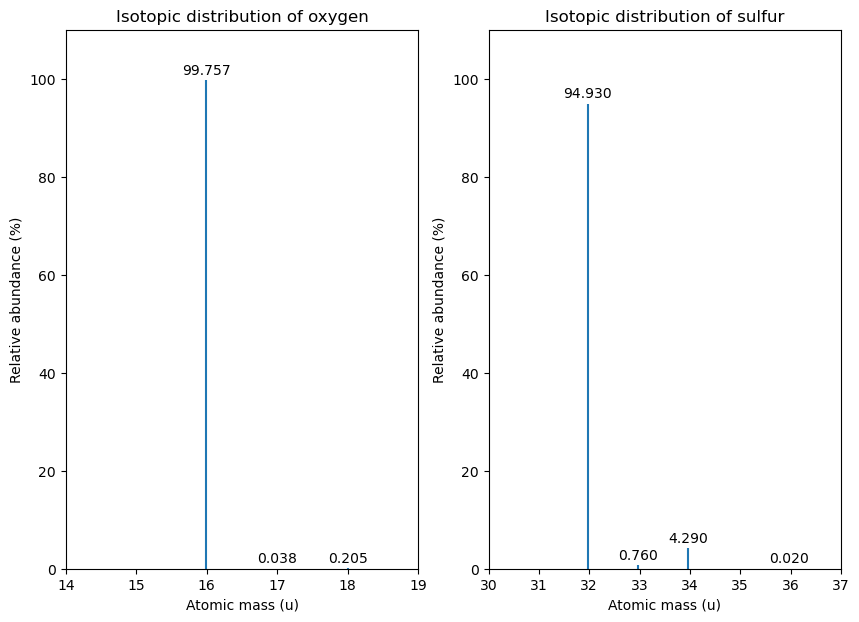

In [28]:
#### other way extra code:

import math
from matplotlib import pyplot as plt

def adjustText(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate('%0.3f' % (y2), xy=(x2, y2), xytext=(x2+0.5,y2+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')
    else:
        plt.annotate('%0.3f' % (y1), xy=(x1, y1), xytext=(x1+0.5,y1+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')

#------------------------------------------------------
def plotDistribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i])
        if int(distribution["mass"][i - 1]) == int(distribution["mass"][i]) \
                and i != 0:
            adjustText(distribution["mass"][i - 1], distribution["abundance"][i - 1],
                       distribution["mass"][i], distribution["abundance"][i])
        else:
            plt.text(x=distribution["mass"][i],
                     y=(distribution["abundance"][i] + 2),
                     s='%0.3f' % (distribution["abundance"][i]), va='center',
                     ha='center')
    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))


plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Isotopic distribution of oxygen")
plotDistribution(oxygen_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,2,2)
plt.title("Isotopic distribution of sulfur")
plotDistribution(sulfur_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

In [29]:
edb = ElementDB()

isotopes = edb.getElement("C").getIsotopeDistribution().getContainer()
carbon_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()

#------------------------------------------------------------------------
isotopes = edb.getElement("N").getIsotopeDistribution().getContainer()

nitrogen_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()

In [30]:
print ("mass difference between 12C and 13C : ", carbon_isotope_difference)

mass difference between 12C and 13C :  1.0033550000000009


In [32]:
print (" mass difference between 14N and N15 :", nitrogen_isotope_difference)

 mass difference between 14N and N15 : 0.9970350000000003


In [33]:
print ("relative deviation :  ", 100*(carbon_isotope_difference -nitrogen_isotope_difference) / carbon_isotope_difference,"%")


relative deviation :   0.6298867300208343 %


In [34]:
##??????????????????????????????????????????????
methanol = EmpiricalFormula("CH3OH")

water = EmpiricalFormula("H2O")

ethanol = EmpiricalFormula("CH2") + methanol
print("Ethanol chemical formula:", ethanol.toString())

Ethanol chemical formula: C2H6O1


In [35]:
print("Ethanol composition:", ethanol.getElementalComposition())

Ethanol composition: {b'C': 2, b'H': 6, b'O': 1}


In [36]:
print("ethanol had ", ethanol.getElementalComposition()[b"H"], "hydrogen  atoms ")

ethanol had  6 hydrogen  atoms 


In [37]:
print("ethanol had ", ethanol.getElementalComposition()[b"O"], "oxygen  atoms")

ethanol had  1 oxygen  atoms


In [38]:
print("ethanol had ", ethanol.getElementalComposition()[b"C"], "carbon  atoms")

ethanol had  2 carbon  atoms


In [52]:
lys = ResidueDB().getResidue("Lysine") ##capital


In [53]:
#??
# to print Name
print(lys.getName())

##  Three Letter Code
print(lys.getThreeLetterCode())

### One Letter Code
print(lys.getOneLetterCode())

## Average Weight
print(lys.getAverageWeight())

###  Mono Weight
print(lys.getMonoWeight())


print(lys.getPka())

#######  Formula
print(lys.getFormula().toString())

Lysine
Lys
K
146.18788276708446
146.1055284466
2.16
C6H14N2O2


In [ ]:
##########################3   Amino Acids ##################################


# An amino acid residue is represented in OpenMS by the class Residue



lys = ResidueDB().getResidue("Lysine")

NameError: name 'lys' is not defined

In [46]:

ox = ModificationsDB().getModification("Oxidation")


print(ox.getUniModAccession())

print(ox.getUniModRecordId())
print(ox.getDiffMonoMass())

###------------------
print(ox.getId())
print(ox.getFullId())
print(ox.getFullName())

print(ox.getDiffFormula())

UniMod:35
35
15.994915
Oxidation
Oxidation (D)
Oxidation or Hydroxylation
O1


In [47]:
isotopes = ox.getDiffFormula().getIsotopeDistribution(CoarseIsotopePatternGenerator(5))
for iso in isotopes.getContainer():
    print (iso.getMZ(), ":", iso.getIntensity())

15.994915 : 0.9975699782371521
16.998269837800002 : 0.0003800000122282654
18.0016246756 : 0.002050000010058284


In [48]:
uridine = RibonucleotideDB().getRibonucleotide(b"U")


print(uridine.getName())

##-----------------------------
print(uridine.getCode())

print(uridine.getAvgMass())

print(uridine.getMonoMass())


print(uridine.getFormula().toString())

print(uridine.isModified())

methyladenosine = RibonucleotideDB().getRibonucleotide(b"m1A")


print(methyladenosine.getName())

print(methyladenosine.isModified())

uridine
U
244.2043
244.0695
C9H12N2O6
False
1-methyladenosine
True
